### 1 Importing libraries and data and renaming columns
### 2 preprocessinng
### 3 the elbow technique for n_clusters assignment
### 4 k-means clustering

### 1 import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, '2 data', 'prepared data', 'task_6.4.csv'), index_col = [0])

In [5]:
df.shape

(3312, 22)

In [6]:
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,prof_cat,unit_price,unit_profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,low profit,15.28,2.67400
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,high profit,43.13,18.11460
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,low profit,1.80,0.86400
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,profit loss,113.64,-26.98950
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,profit loss,70.71,-93.69075


### 2 preprocessing

####  removing categorical variables, subsetting 

In [7]:
#subsetting to include only numerical columns
dfk = df[['Order Date', 'Sales', 'Quantity', 'Discount', 'Profit', 'unit_price', 'unit_profit']].copy()
dfk

,Order Date,Sales,Quantity,Discount,Profit,unit_price,unit_profit
0,2020-01-01,48.896,4,0.2,8.5568,15.28,2.674000
1,2020-01-01,474.430,11,0.0,199.2606,43.13,18.114600
2,2020-01-01,3.600,2,0.0,1.7280,1.80,0.864000
3,2020-01-01,454.560,5,0.2,-107.9580,113.64,-26.989500
4,2020-01-01,141.420,5,0.6,-187.3815,70.71,-93.690750
...,...,...,...,...,...,...,...
3307,2020-12-30,90.930,7,0.0,2.7279,12.99,0.389700
3308,2020-12-30,52.776,3,0.2,19.7910,21.99,8.246250
3309,2020-12-30,13.904,2,0.2,4.5188,8.69,2.824250
3310,2020-12-30,20.720,2,0.2,6.4750,12.95,4.046875


In [8]:
dfk.describe()

,Sales,Quantity,Discount,Profit,unit_price,unit_profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,221.381418,3.766908,0.156467,28.212340,74.739224,1.536479
std,585.257531,2.221776,0.207429,241.864342,190.299694,114.385897
min,0.444000,1.000000,0.000000,-3839.990400,0.990000,-2929.484500
25%,17.018000,2.000000,0.000000,1.763200,6.480000,0.750356
50%,53.810000,3.000000,0.200000,8.296800,19.980000,2.892000
75%,205.105700,5.000000,0.200000,28.315125,70.980000,9.402075
max,13999.960000,14.000000,0.800000,6719.980800,3999.990000,1679.995200


In [9]:
dfk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 3311
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order Date   3312 non-null   object 
 1   Sales        3312 non-null   float64
 2   Quantity     3312 non-null   int64  
 3   Discount     3312 non-null   float64
 4   Profit       3312 non-null   float64
 5   unit_price   3312 non-null   float64
 6   unit_profit  3312 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 207.0+ KB


#### order date column wrangling

In [10]:
#change order date dtype from string to datetime, then convert to an integer for analysis. 
dfk['Order Date'] = pd.to_datetime(dfk['Order Date'])

In [11]:
dfk['Order Date'] = dfk['Order Date'].astype('int64') // 10**9

In [12]:
dfk['Order Date']

0       1577836800
1       1577836800
2       1577836800
3       1577836800
4       1577836800
           ...    
3307    1609286400
3308    1609286400
3309    1609286400
3310    1609286400
3311    1609286400
Name: Order Date, Length: 3312, dtype: int64

### 3 determine clusters, the elbow technique

In [13]:
num_cl = range(1, 20) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(dfk).score(dfk) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

[-2.8733145459934854e+17,
 -6.613817138860846e+16,
 -3.0400124622821148e+16,
 -1.6688399472547472e+16,
 -1.0496491871882458e+16,
 -7106666334839375.0,
 -5405988277077185.0,
 -3993509108311186.0,
 -3250882734268664.0,
 -2511633172207401.0,
 -1925249046730261.5,
 -1466373314072628.8,
 -1324674630882390.8,
 -1187552244625371.2,
 -1063376769821461.8,
 -949572395762704.0,
 -837972768454979.8,
 -752234477339578.4,
 -680339992697834.6]

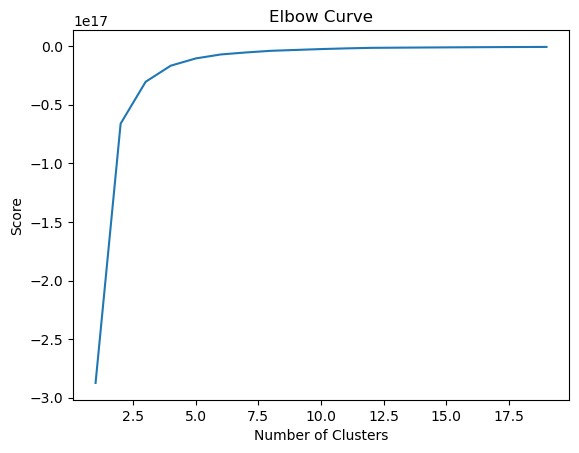

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### using 3-5 clusters seems appropriate, choosing 5 for this exercise

### 4 k-means algorithm

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(dfk)

C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [26]:
# Add cluster labels to the original DataFrame
dfk['clusters'] = kmeans.fit_predict(dfk)

C:\Program Files\anaconda.python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
dfk.head()

,Order Date,Sales,Quantity,Discount,Profit,unit_price,unit_profit,clusters
0,1577836800,48.896,4,0.2,8.5568,15.28,2.67400,1
1,1577836800,474.430,11,0.0,199.2606,43.13,18.11460,1
2,1577836800,3.600,2,0.0,1.7280,1.80,0.86400,1
3,1577836800,454.560,5,0.2,-107.9580,113.64,-26.98950,1
4,1577836800,141.420,5,0.6,-187.3815,70.71,-93.69075,1


In [29]:
dfk['clusters'].value_counts()

2    754
3    735
1    645
4    590
0    588
Name: clusters, dtype: int64

In [30]:
#save file as csv
df.to_csv(r'C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 6\2 data\prepared data\task_6.6_clusters.csv')

In [31]:
#dfk = df[df['clusters'] == 0]

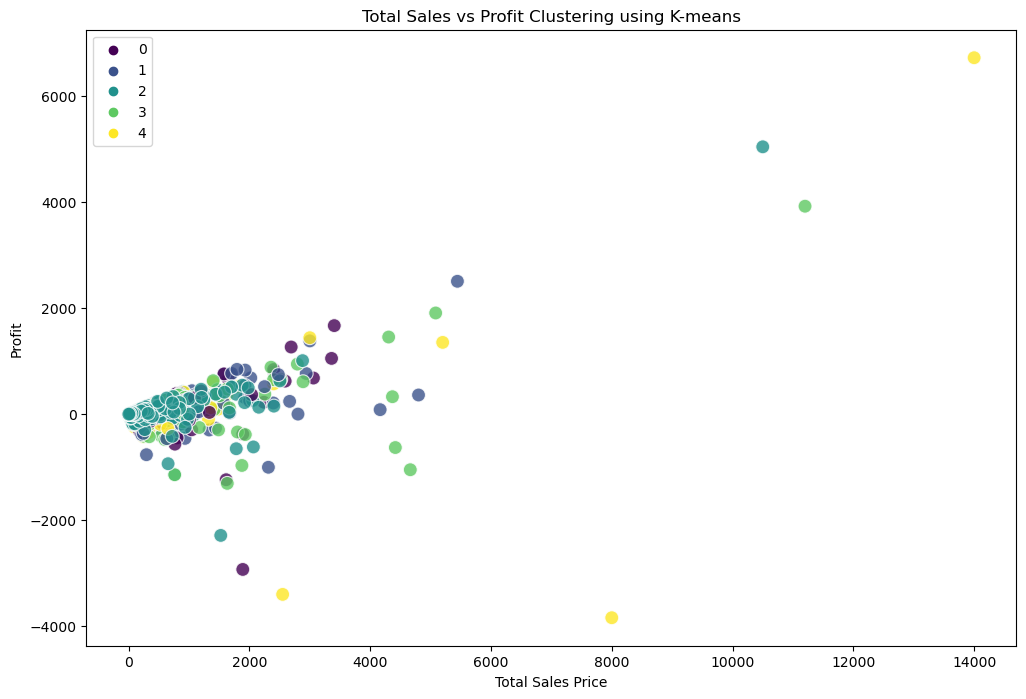

In [32]:
# Plot the clusters for the dependent 'profit' and independent 'sales' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['Sales'], y=dfk['Profit'], hue='clusters', s=100, data=dfk, palette='viridis', alpha=0.8) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Sales Price') # Label x-axis.
plt.ylabel('Profit') # Label y-axis.
plt.title('Total Sales vs Profit Clustering using K-means')
plt.legend()
plt.show()

### insight:
    * cluster 4, the 3rd largest, is distinct from others and needs to be identified
    * cluster 1 has unique negative profit values, largest cluster
    * cluster 3 is smallest cluster, likely represents printers 
    * cluster 2 and 0 are difficult to visualize in this plot

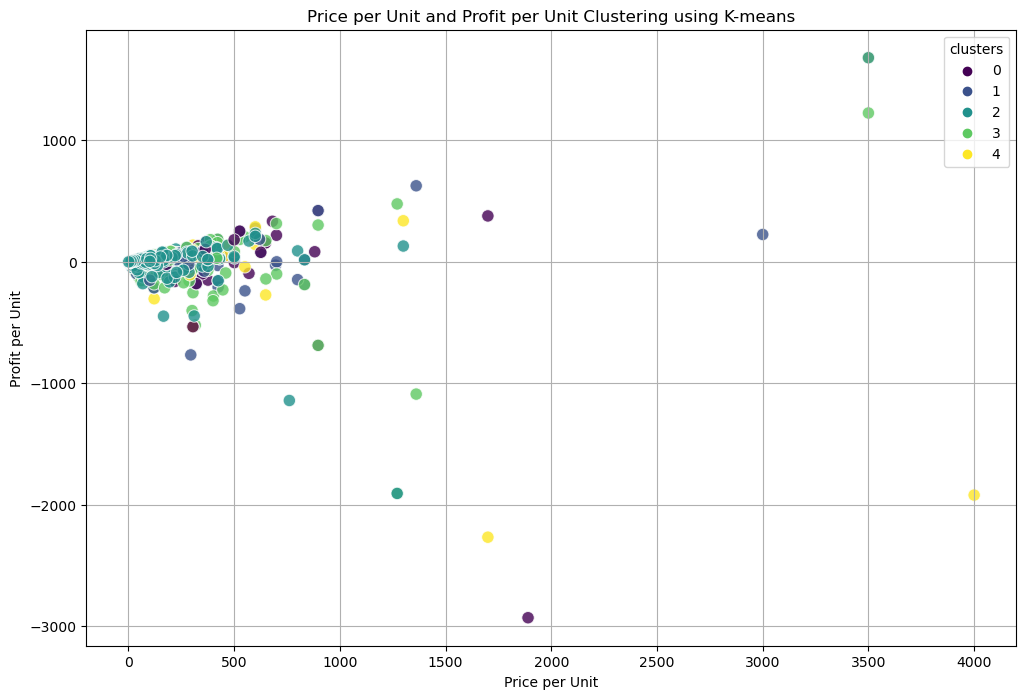

In [34]:
# plot clusters for unit_price and unit_profit variables. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['unit_price'], y=dfk['unit_profit'], hue='clusters', s=80, data=dfk, palette='viridis', alpha=0.8) 
ax.grid(True) 
plt.xlabel('Price per Unit') 
plt.ylabel('Profit per Unit') 
plt.title('Price per Unit and Profit per Unit Clustering using K-means')
plt.show()

### insight:
    * this plot displays the normalized profit and sales values
    * similar patterns observed but centroids are even closer making visualizing more difficult

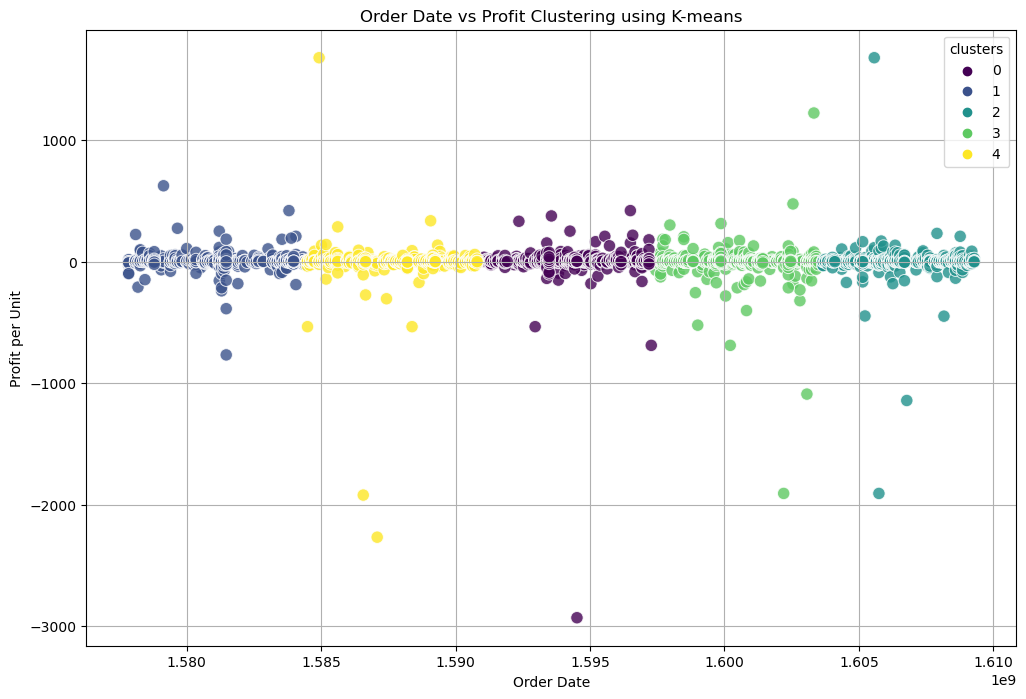

In [35]:
# plot clusters for order date and unit_profit variables. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['Order Date'], y=dfk['unit_profit'], hue='clusters', s=80, data=dfk, palette='viridis', alpha=0.8) 
ax.grid(True) 
plt.xlabel('Order Date') 
plt.ylabel('Profit per Unit') 
plt.title('Order Date vs Profit Clustering using K-means')
plt.show()

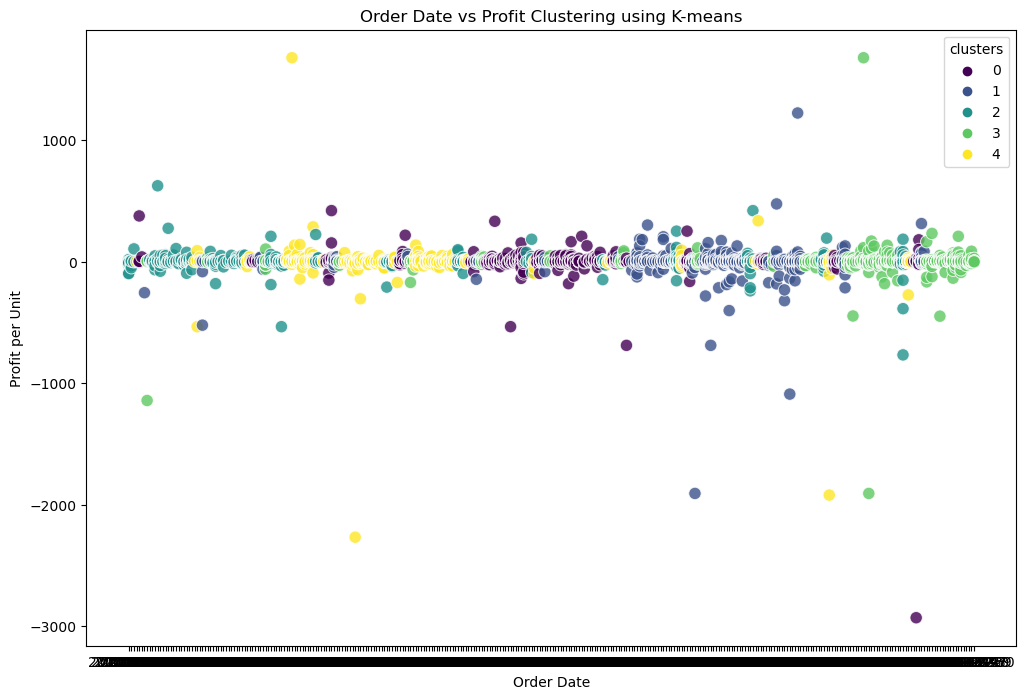

In [36]:
# plot clusters for order date and unit_profit variables. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Order Date'], y=df['unit_profit'], hue='clusters', s=80, data=df, palette='viridis', alpha=0.8) 
ax.grid(False) 
plt.xlabel('Order Date') 
plt.ylabel('Profit per Unit') 
plt.title('Order Date vs Profit Clustering using K-means')
plt.show()

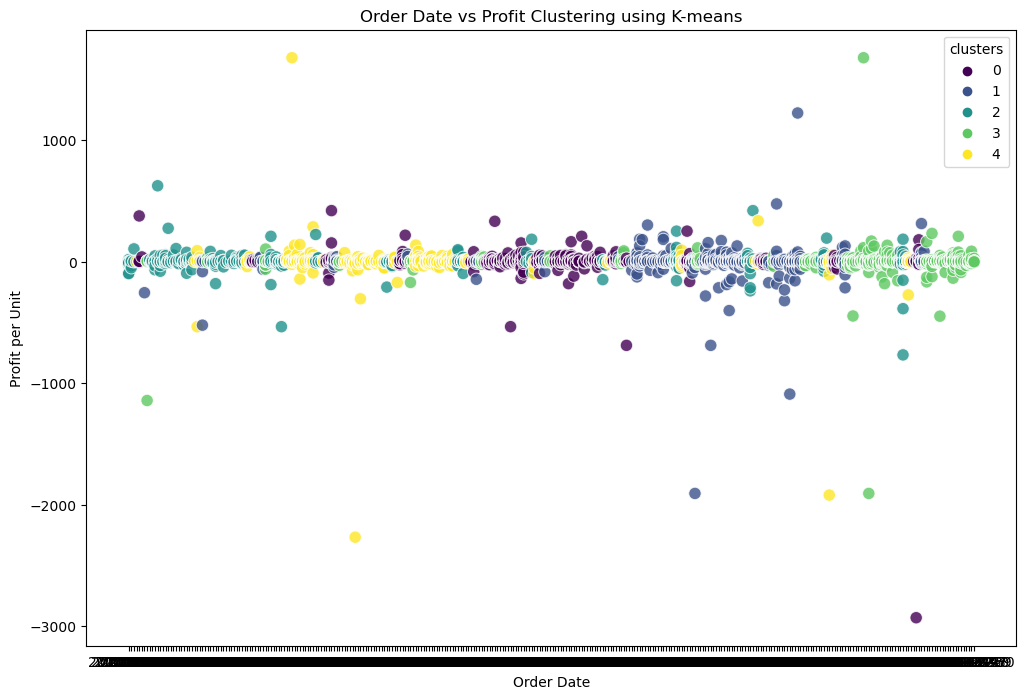

In [37]:
# plot clusters for order date and unit_profit variables. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Order Date'], y=df['unit_profit'], hue='clusters', s=80, data=df, palette='viridis', alpha=0.8) 
ax.grid(False) 
plt.xlabel('Order Date') 
plt.ylabel('Profit per Unit') 
plt.title('Order Date vs Profit Clustering using K-means')
plt.show()

#### insight:
    * cluster 1 and 2 have a unique orientation regarding date and need to be explored as it suggests there is seasonality 
    * 

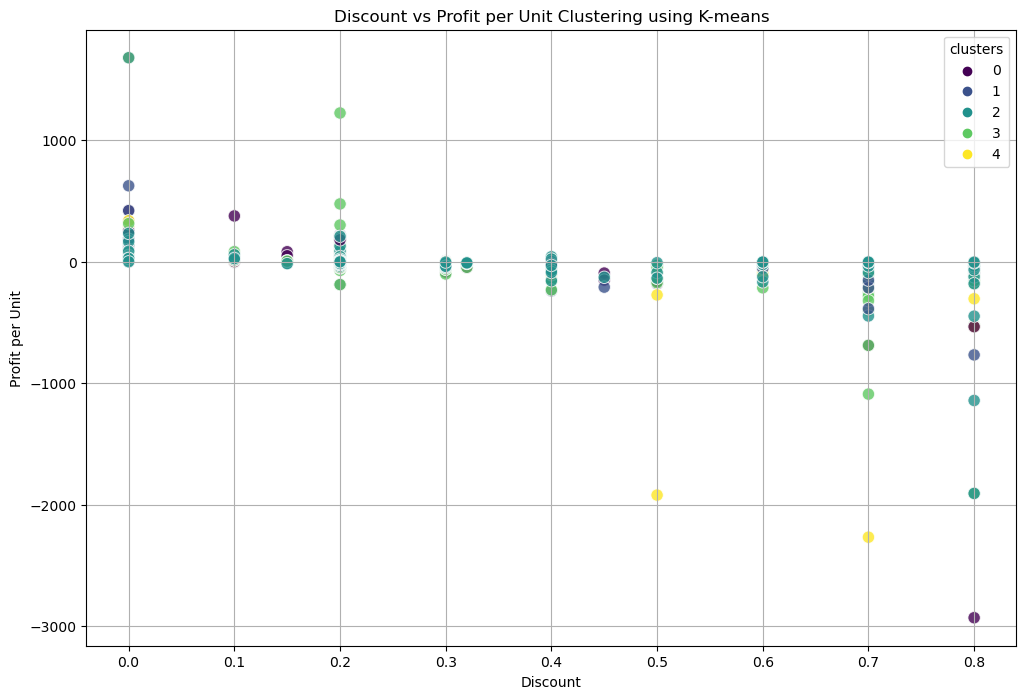

In [38]:
# plot clusters for discount and unit_profit variables. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['Discount'], y=dfk['unit_profit'], hue='clusters', s=80, data=dfk, palette='viridis', alpha=0.8) 
ax.grid(True) 
plt.xlabel('Discount') 
plt.ylabel('Profit per Unit') 
plt.title('Discount vs Profit per Unit Clustering using K-means')
plt.show()

#### insight:
    * cluster 4 again shows the most promising pattern to explore regarding profit
    * at 20% discount, a large grouping of products inside cluster 4 are profitable
    * at 50% discount the products inside cluster 4 loose profitability

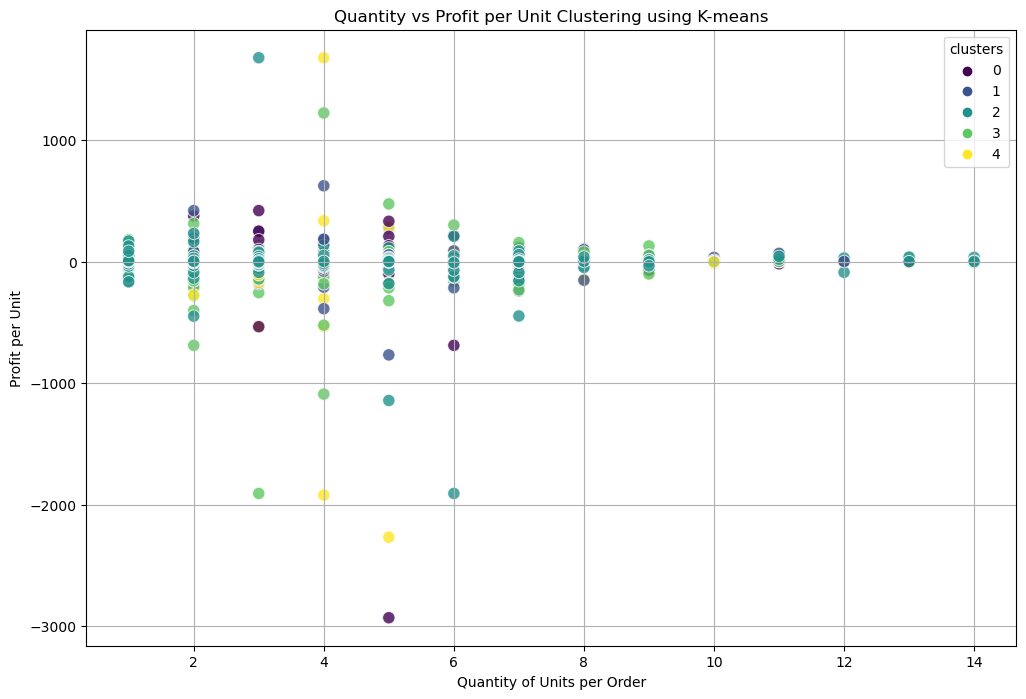

In [39]:
# plot clusters for quantity and unit_profit variables. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['Quantity'], y=dfk['unit_profit'], hue='clusters', s=80, data=dfk, palette='viridis', alpha=0.8) 
ax.grid(True) 
plt.xlabel('Quantity of Units per Order') 
plt.ylabel('Profit per Unit') 
plt.title('Quantity vs Profit per Unit Clustering using K-means')
plt.show()

#### insight:
        * cluster 0 is showing a unique pattern of larger quantity of units per order
        * cluster 4 shows a negative correlation with profit and quantity,
        * need to explore for a connection between quantity and discount 

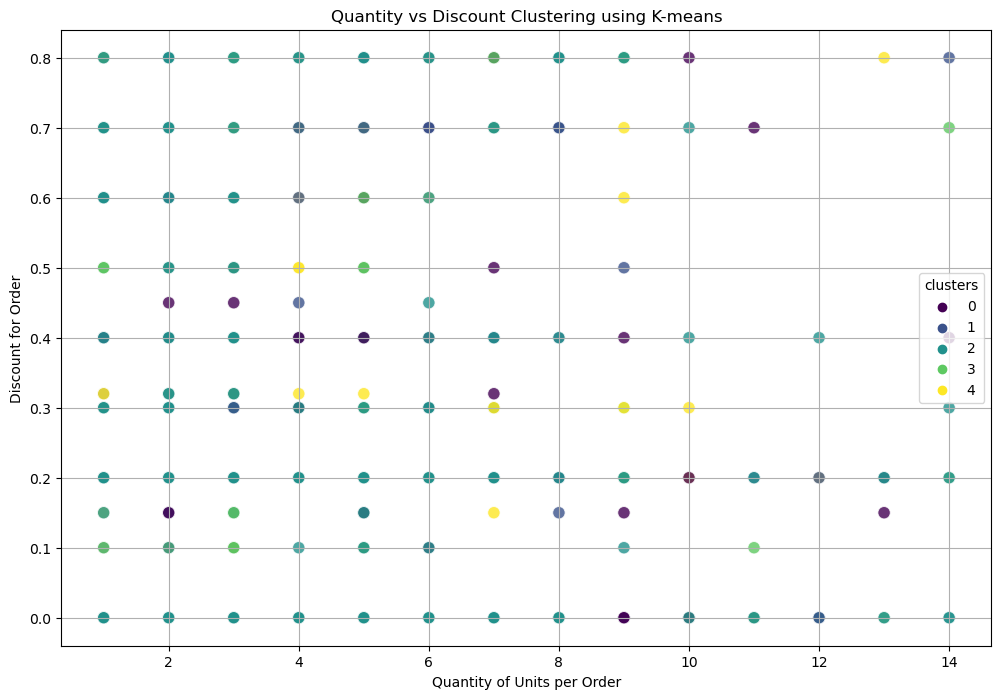

In [40]:
# plot clusters for quantity and discount variables. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dfk['Quantity'], y=dfk['Discount'], hue='clusters', s=80, data=dfk, palette='viridis', alpha=0.8) 
ax.grid(True) 
plt.xlabel('Quantity of Units per Order') 
plt.ylabel('Discount for Order') 
plt.title('Quantity vs Discount Clustering using K-means')
plt.show()

#### insight:
    * unclear association between discount and quantity regarding the k-means clusters 

In [41]:
dfk.loc[dfk['clusters'] == 0, 'cluster'] = 'purple'
dfk.loc[dfk['clusters'] == 1, 'cluster'] = 'blue'
dfk.loc[dfk['clusters'] == 2, 'cluster'] = 'aqua'
dfk.loc[dfk['clusters'] == 3, 'cluster'] = 'green'
dfk.loc[dfk['clusters'] == 4, 'cluster'] = 'yellow'


In [45]:
dfk.groupby('cluster').agg({'unit_price':['mean', 'median'], 
                         'unit_profit':['mean', 'median'], 
                         'Quantity':['mean', 'median'],
                         'Discount':['mean', 'median'],    
                         'Discount':['mean', 'median']})

unit_price         unit_profit           Quantity         Discount  \
              mean  median        mean   median      mean median      mean   
cluster                                                                      
aqua     68.717493  19.985    1.955892  2.85530  3.844828    3.0  0.151804   
blue     75.489101  18.840    4.919349  2.76950  3.883721    3.0  0.157938   
green    80.067388  19.840    0.309471  2.89800  3.691156    3.0  0.161456   
purple   78.253163  23.490    1.861031  3.31225  3.751701    3.0  0.145476   
yellow   71.475356  17.600   -1.492631  2.40590  3.649153    3.0  0.165559   

                
        median  
cluster         
aqua       0.2  
blue       0.2  
green      0.2  
purple     0.0  
yellow     0.2

### Insight Summary:
    * cluster 4 is has the best pattern with profitable sales and needs to be investigated
    * cluster 1 seems to indicate a pattern of unprofitable sales and products which should be investigated